# Auteur : Marcel MOUDILA, 2022-2023
## Fouille de données - TP2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder
from sklearn import tree , metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



### Partie 1 : fichier contact-lenses.csv

In [2]:
df = pd.read_csv("contact-lenses.csv")

#### Analyse exploratoire 

In [3]:
df.shape # les dimensions de df

(24, 5)

In [4]:
df.isnull().value_counts()  # test booléen des valeurs manquantes par variables

age    spectacle-prescrip  astigmatism  tear-prod-rate  contact-lenses
False  False               False        False           False             24
dtype: int64

In [5]:
df.head() # visualisation de df

,age,spectacle-prescrip,astigmatism,tear-prod-rate,contact-lenses
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none


<AxesSubplot:xlabel='age', ylabel='Percent'>

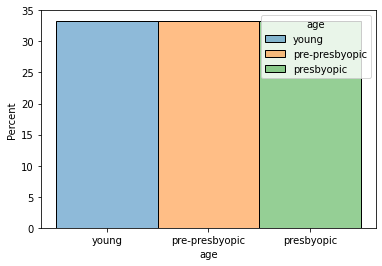

In [6]:
sns.histplot(df, x="age", hue="age", stat = "percent") # pourcentage de chaque modalités pour la variable "age"

<AxesSubplot:xlabel='spectacle-prescrip', ylabel='Percent'>

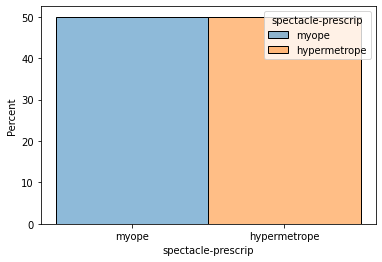

In [7]:
sns.histplot(df, x="spectacle-prescrip", hue="spectacle-prescrip", stat = "percent")

<AxesSubplot:xlabel='astigmatism', ylabel='Percent'>

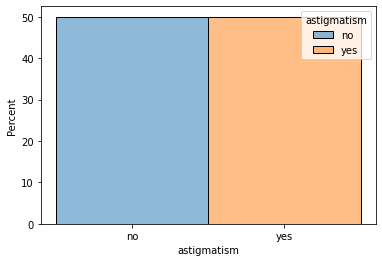

In [8]:
sns.histplot(df, x= "astigmatism", hue = "astigmatism", stat = "percent" )


<AxesSubplot:xlabel='tear-prod-rate', ylabel='Percent'>

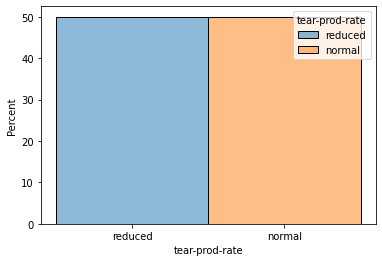

In [9]:
sns.histplot(df, x="tear-prod-rate", hue = "tear-prod-rate", stat = "percent")

<AxesSubplot:xlabel='contact-lenses', ylabel='Percent'>

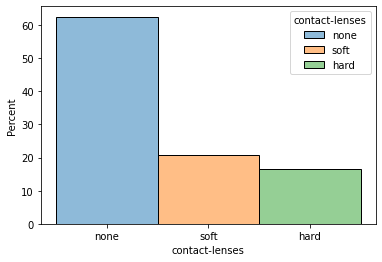

In [10]:
sns.histplot(df, x = "contact-lenses", hue = "contact-lenses", stat = "percent") 

# Part 2: Categorical and numerical data

## LabelEncoder

In [11]:
df_LabelEncoder = df.copy()
Y = df_LabelEncoder["contact-lenses"]
enconder = LabelEncoder().fit_transform(Y)
Y = enconder
Y


array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1])

## OrdinalEnconder

In [12]:
#df_ordinalEnconder = df.copy()
#Y = df_ordinalEnconder["contact-lenses"].astype("category")
#enconder = OrdinalEncoder().fit_transform(Y,dtype= "category")
#df_ordinalEnconder["contact-lenses"]
#df_ordinalEnconder.head()


## LabelBinarizer 

In [13]:
df_LabelBinarizer = df.copy()
Y = df_LabelBinarizer["contact-lenses"]
enconder = LabelBinarizer().fit_transform(Y)
Y = enconder
Y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

## OneHotEnconder

In [14]:
df_oneHotEnconder = df.copy()
Y = df_oneHotEnconder[["contact-lenses"]]
enconder = OneHotEncoder()
feature_arry = enconder.fit_transform(Y).toarray()
feature_labels= enconder.categories_
Y = pd.DataFrame(feature_arry,columns = feature_labels)
Y
#df_LabelBinarizer[["contact-lenses"]] = enconder
#df_LabelBinarizer.head()

,hard,none,soft
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


# Part 3: Decision trees and Rule-based classification

## data set : breast_cancer.csv

In [15]:
df = pd.read_csv("breast_cancer.csv")


## Analyse exploratoire

In [16]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [17]:
# nombre de valeurs manquantes par variables
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [18]:
# on a qu'une seule valeur manquante dans la variable "breast-quad", recherche du numéro de l'instance
for i in range(len(np.array(df["breast-quad"]))):
    if df["breast-quad"].isnull()[i] == True :
        print(i)

240


In [19]:
# on a 8 valeurs manquantes dans la variable "node-caps", recherche des numéros des instances
res = []
for i in range(len(np.array(df["node-caps"]))):
    if df["node-caps"].isnull()[i] == True :
        res.append(i)
print(res)

[20, 31, 50, 54, 71, 92, 149, 264]


In [20]:
# création d'une liste des numéros des instances avec valeurs manquantes
instances_NA = res + [240]   # l'observation 240 de la variable "breast-quad" est manquante
print(instances_NA)

[20, 31, 50, 54, 71, 92, 149, 264, 240]


In [21]:
# les types de nos variables
df.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig      object
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object

<AxesSubplot:xlabel='age', ylabel='Count'>

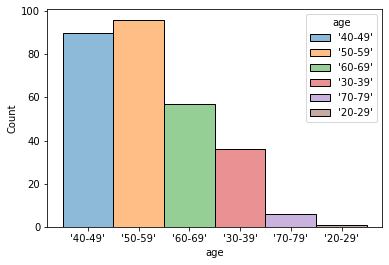

In [22]:
# visualisation de chaque variable (modalités, effectifs)
sns.histplot(data = df, x = df.columns[0], hue = df.columns[0])

<AxesSubplot:xlabel='menopause', ylabel='Count'>

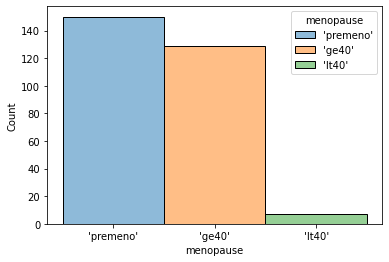

In [23]:
sns.histplot(data = df, x = df.columns[1], hue = df.columns[1])

<AxesSubplot:xlabel='tumor-size', ylabel='Count'>

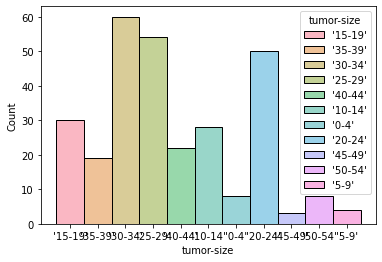

In [24]:
sns.histplot(data = df, x = df.columns[2], hue = df.columns[2])

<AxesSubplot:xlabel='inv-nodes', ylabel='Count'>

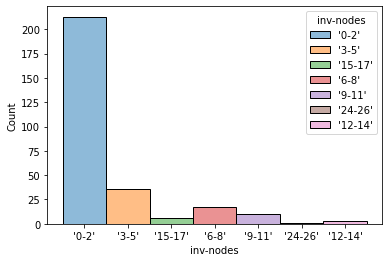

In [25]:
sns.histplot(data = df, x = df.columns[3], hue = df.columns[3])

<AxesSubplot:xlabel='node-caps', ylabel='Count'>

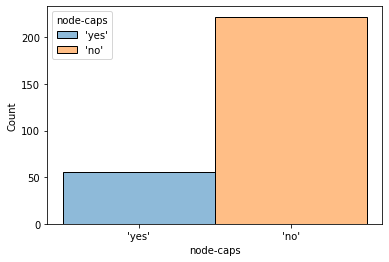

In [26]:
sns.histplot(data = df, x = df.columns[4], hue = df.columns[4])

<AxesSubplot:xlabel='deg-malig', ylabel='Count'>

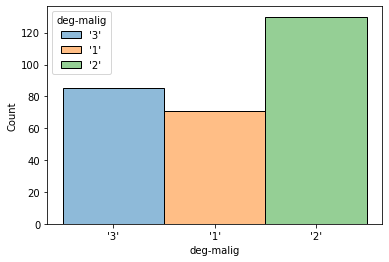

In [27]:
sns.histplot(data = df, x = df.columns[5], hue = df.columns[5])

<AxesSubplot:xlabel='breast', ylabel='Count'>

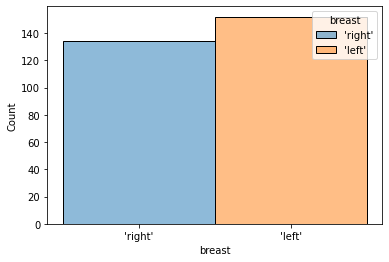

In [28]:
sns.histplot(data = df, x = df.columns[6], hue = df.columns[6])

<AxesSubplot:xlabel='breast-quad', ylabel='Count'>

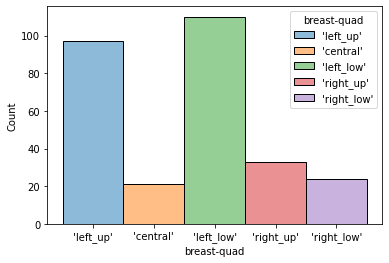

In [29]:
sns.histplot(data = df, x = df.columns[7], hue = df.columns[7])

<AxesSubplot:xlabel='irradiat', ylabel='Count'>

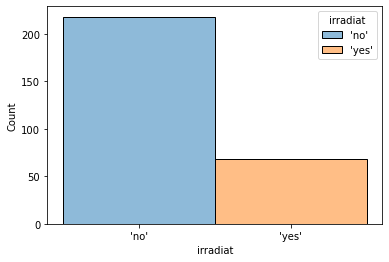

In [30]:
sns.histplot(data = df, x = df.columns[8], hue = df.columns[8])

<AxesSubplot:xlabel='Class', ylabel='Count'>

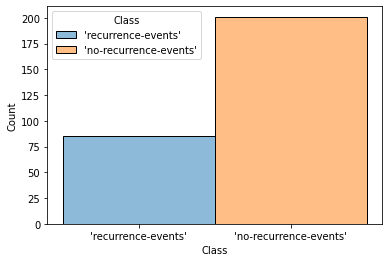

In [31]:
sns.histplot(data = df, x = df.columns[9], hue = df.columns[9])

## Nettoyage des données

### choix de suppression des lignes ayant une valeur manquante

In [32]:
print(instances_NA)

[20, 31, 50, 54, 71, 92, 149, 264, 240]


In [33]:
df2 = df.copy()
df2 = df2.drop(labels = instances_NA,axis = 0)

In [34]:
# test booléen d'existence de valeurs manquantes dans le dataframe
df2.isnull().values.any()

False

### encodage en utilisant LabelEnconder

In [35]:
p = df2.shape[1]
tab_new = []
for j in range(p) : 
    colonne_name = df2.columns[j]
    enconder = LabelEncoder()
    colonne_enconde = enconder.fit_transform(df2[colonne_name])
    tab_new = tab_new + [colonne_enconde]
df3 = pd.DataFrame({df2.columns[j] :tab_new[j] for j in range(p)})
df3.head()




,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,2,2,0,1,2,1,2,0,1
1,3,0,2,0,0,0,1,0,0,0
2,3,0,6,0,0,1,0,1,0,1
3,2,2,6,0,1,2,1,1,1,0
4,2,2,5,4,1,1,0,4,0,1


## entrainement 

###  DecisionTreeClassifier

In [36]:
X = df3.drop(labels = "Class", axis = 1)
Y = df3["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

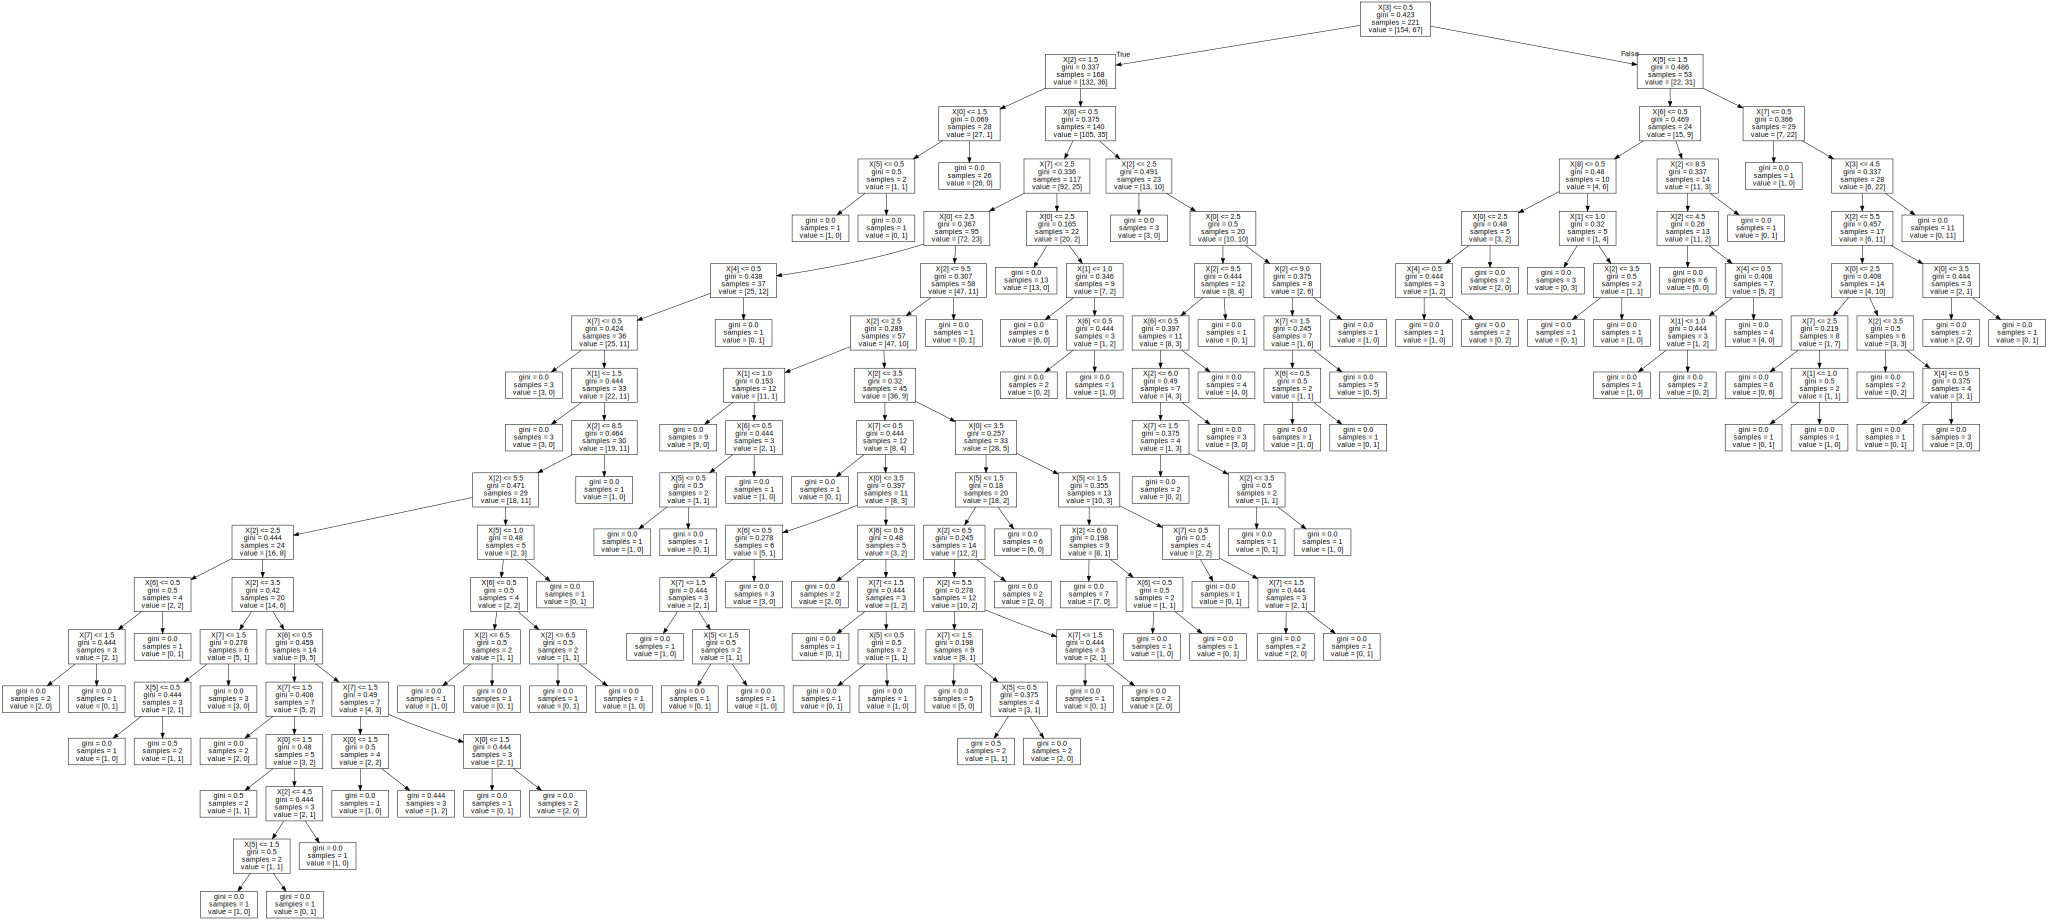

In [37]:
# visualisation de l'arbre de décision (pip install graphviz, avant d'importer le module)
import graphviz
dot_data = tree.export_graphviz(clf)
graph = graphviz.Source(dot_data)
graph

### évaluation 

In [38]:
Y_pred = clf.predict(X_test)
M1 = metrics.accuracy_score(Y_test,Y_pred)

In [39]:
M2 = metrics.precision_score(Y_test,Y_pred)

In [40]:
M3 = metrics.recall_score(Y_test,Y_pred)

In [41]:
resultat = pd.DataFrame({"accuracy" : M1, "precision" : M2 , "recall" : M3},index = ["DecisionTreeClassifier"])
print(resultat)

                        accuracy  precision    recall
DecisionTreeClassifier  0.767857   0.545455  0.428571


### cross validation

In [42]:
clf = tree.DecisionTreeClassifier()
score = cross_val_score(clf,X,Y,cv=10)
print(score)

[0.75       0.60714286 0.57142857 0.67857143 0.67857143 0.57142857
 0.64285714 0.59259259 0.55555556 0.7037037 ]


In [43]:
score.mean()

0.6351851851851851

### Grid Search CV

In [44]:
# recherche des meilleurs hyperparamètres 
clf = tree.DecisionTreeClassifier()
dic = {"criterion":["gini","entropy"], 'max_depth': np.arange(3, 15)}
GS = GridSearchCV(estimator = clf, param_grid= dic, cv= 10).fit(X,Y)
GS.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [45]:
# cross validation avec les meilleurs hyperparamètres trouvés
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
score = cross_val_score(clf,X,Y,cv=10)
print(score)

[0.71428571 0.78571429 0.71428571 0.75       0.75       0.64285714
 0.78571429 0.81481481 0.7037037  0.7037037 ]


In [46]:
print(score.mean())

0.7365079365079366


### Matrice de confusion

In [47]:
clf =  tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
conf = metrics.confusion_matrix(Y_test,Y_pred)
resultat = pd.DataFrame(conf, columns = [label for label in clf.classes_], 
                                index =  [label for label in clf.classes_])
print(resultat)


    0  1
0  39  3
1   9  5


### Courbe ROC, et AUC du modèle trouvé par Grid Search CV 

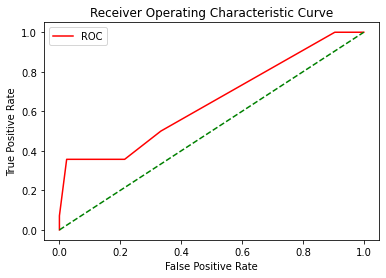

In [48]:
# construction de la courbe ROC
clf =  tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf.fit(X_train,Y_train)
Y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_pred_proba[:,1])
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()


In [49]:
# détermination de la valeur AUC
AUC = metrics.roc_auc_score(Y_test,Y_pred_proba[:,1])
AUC

0.6479591836734694